In [6]:
import time

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.rcParams['figure.figsize'] = [14, 8]

In [2]:
# Поиск минимума функции методом квадратичной интерполяции (Метод Пауэлла)
# f - функция
# a - ограчение слева
# b - ограничение справа
# h - шаг по оси X
# eps - максимальная погрешность по оси X
# x1 - начальное значение X1 
def square_interpolation(f, a, b, h, eps, x1=None):
    if x1 is None:
        if a + h > b:
            if f(a) < f(b):
                return (a, f(a))
            else:
                return (b, f(b))
        x1 = a
      
    if x1 < a or x1 > b:
        raise ValueError(f'Inapropriate x1: {x1}')
    elif x1 + h > b:
        if f(x1) < f(b):
            return (x1, f(x1))
        else:
            return (b, f(b))
    
    x2 = x1 + h
    f1, f2 = f(x1), f(x2)
    if f1 > f2:
        x3 = x1 + 2*h
    elif f1 < f2:
        x3 = x1 - h
    
    outbound = False
    if x3 < a or x3 > b:
        x3 = min(max(x3, a), b)
        f3 = f(x3)
        outbound = True
    
    f3 = f(x3)
    if f1 < min(f2, f3):
        x_min, f_min = x1, f1
    elif f2 < min(f1, f3):
        x_min, f_min = x2, f2
    elif f3 < min(f1, f2):
        x_min, f_min = x3, f3
    else: # all fs equals
        return square_interpolation(f, a, b, h, eps, x1=min(max(x2, x3), b))
    
    if outbound:
        return (x_min, f_min)
    
    numerator = (x2**2 - x3**2)*f1 + (x3**2 - x1**2)*f2 + (x1**2 - x2**2)*f2
    denominator = (x2 - x3)*f1 + (x3 - x1)*f2 + (x1 - x2)*f3
    if denominator == 0:
        if x1 == x_min:
            return (x_min, f_min)
        return square_interpolation(f, a, b, h, eps, x1=x_min)
    
    x_m = numerator/denominator
    f_m = f(x_m)
    
    if abs(f_m - f_min) < eps:
        return (x_m, f_m)
    elif f_m < f_min:
        return square_interpolation(f, a, b, h, eps, x1=x_m)
    elif x1 != x_min:
        return square_interpolation(f, a, b, h, eps, x1=x_min)
    else:
        return (x1, f1)

In [3]:
# Поиск минимума функции методом золотого сечения
# f - функция
# a - ограничение слева
# b - ограничение справа
# eps - максимальная погрешность по оси X
def golden_section_search(f, a, b, eps):
    PHI = (1 + 5**0.5) / 2
    
    x1, x2 = b - (b - a)/PHI, a + (b - a)/PHI
    f1, f2 = f(x1), f(x2)
        
    if f1 >= f2:
        a = x1
    else:
        b = x2
    
    if abs(b - a) < eps:
        x = (a + b) / 2
        fx = f(x)
        return (x, f(x))
    
    return golden_section_search(f, a, b, eps)

In [4]:
def debug_golden_section_search(f, a, b, eps, debug=False, r=3):
    PHI = (1 + 5**0.5) / 2
    
    x1, x2 = b - (b - a)/PHI, a + (b - a)/PHI
    f1, f2 = f(x1), f(x2)
    
    print(f'a: {round(a, r)}, b: {round(b, r)}')
    print(f'(x1, f1): ({round(x1, r)}, {round(f1, r)})')
    print(f'(x2, f2): ({round(x2, r)}, {round(f2, r)})')
        
    if f1 >= f2:
        print(f'f1 >= f2 then a = {round(x1, r)} (x1)')
        a = x1
    else:
        print(f'f1 < f2 then b = {round(x2, r)} (x2)')
        b = x2
    
    print(f'|b - a|: {round(abs(b - a), r)}, eps: {eps}')
    if abs(b - a) < eps:
        x = (a + b) / 2
        fx = f(x)
        print(f'|b - a| < eps then x: {round(x, r)}, f(x): {round(fx, r)} ')
        return (x, f(x))
    print('======')
    
    return golden_section_search(f, a, b, eps, debug, r)

In [146]:
# Функция f(x) = x^4/4 + x^2 - 8x + 12
f = lambda x: 0.25*x**4 + x**2 - 8*x + 12
# Промежуток поиска экстремума [a, b]
a, b = (0, 2)
# Точность вычислений
eps = 0.005

In [149]:
# Производная исходной функции f'(x) = x^3 + 2x - 8
fp = lambda x: x**3 + 2*x - 8
# Точка, в которой производная равна нулю (найдена эксперементальным путем)
xp = 1.6702446969627331

print(fp(xp))
print(f(xp))

0.0
3.373390492089669


In [147]:
cache_time = time.process_time_ns()
x1, y1 = square_interpolation(f, a, b, eps, eps)
t1 = time.process_time_ns() - cache_time
print('Результат нахождения минимума методом квадратичной интерполяции')
print(f'X: {x1}, Y: {y1}')
print(f'Время выполнения: {t1/1000}μs')

Результат нахождения минимума методом квадратичной интерполяции
X: 1.6700000000000013, Y: 3.3733908025000012
Время выполнения: 0.0μs


In [148]:
cache_time = time.process_time_ns()
x2, y2 = golden_section_search(f, a, b, eps)
t2 = time.process_time_ns() - cache_time

print('Результат нахождения минимума методом золотого сечения')
print(f'X: {x2}, Y: {y2}')
print(f'Время выполнения: {t2/1000}μs')

Результат нахождения минимума методом золотого сечения
X: 1.6699233212997366, Y: 3.3733910275092533
Время выполнения: 0.0μs


a: 0, b: 2
(x1, f1): (0.7639, 6.5573)
(x2, f2): (1.2361, 4.2229)
f1 >= f2 then a = 0.7639 (x1)
|b - a|: 1.2361, eps: 0.005
a: 0.7639, b: 2
(x1, f1): (1.2361, 4.2229)
(x2, f2): (1.5279, 3.4738)
f1 >= f2 then a = 1.2361 (x1)
|b - a|: 0.7639, eps: 0.005
a: 1.2361, b: 2
(x1, f1): (1.5279, 3.4738)
(x2, f2): (1.7082, 3.381)
f1 >= f2 then a = 1.5279 (x1)
|b - a|: 0.4721, eps: 0.005
a: 1.5279, b: 2
(x1, f1): (1.7082, 3.381)
(x2, f2): (1.8197, 3.4948)
f1 < f2 then b = 1.8197 (x2)
|b - a|: 0.2918, eps: 0.005
a: 1.5279, b: 1.8197
(x1, f1): (1.6393, 3.3783)
(x2, f2): (1.7082, 3.381)
f1 < f2 then b = 1.7082 (x2)
|b - a|: 0.1803, eps: 0.005
a: 1.5279, b: 1.7082
(x1, f1): (1.5967, 3.4007)
(x2, f2): (1.6393, 3.3783)
f1 >= f2 then a = 1.5967 (x1)
|b - a|: 0.1115, eps: 0.005
a: 1.5967, b: 1.7082
(x1, f1): (1.6393, 3.3783)
(x2, f2): (1.6656, 3.3735)
f1 >= f2 then a = 1.6393 (x1)
|b - a|: 0.0689, eps: 0.005
a: 1.6393, b: 1.7082
(x1, f1): (1.6656, 3.3735)
(x2, f2): (1.6819, 3.3741)
f1 < f2 then b = 1.6819 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


[None]

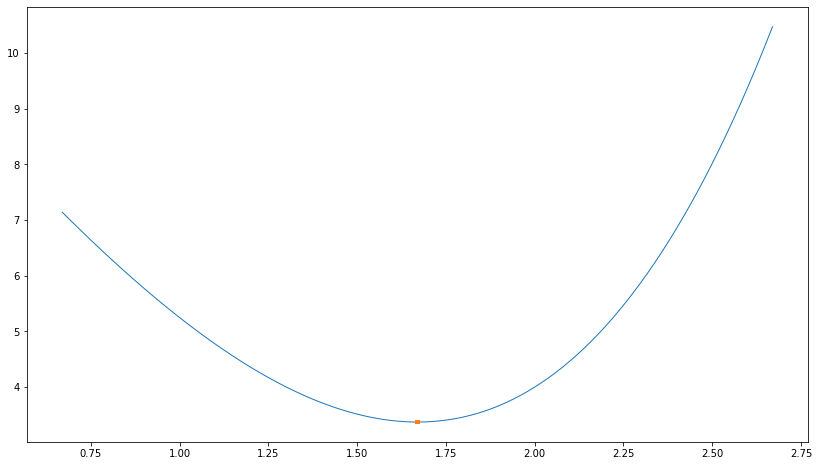

In [77]:
min_x, min_f = golden_section_search(f, a, b, eps, True, 4)
#min_x, min_f = square_interpolation(f, a, b, eps, eps)
half_interval = (b - a)/2

graph_l = -half_interval + min_x
graph_r = half_interval + min_x
pts_amount = abs(graph_r - graph_l) / eps

x = np.linspace(-half_interval + min_x, half_interval + min_x, pts_amount)
y = np.array([f(t) for t in x])
y_min = np.array([min_f for t in x])

#plt.title(func_str)

dot_eps = 0.0001; n = 50
lines = plt.plot(x, y, np.array([min_x + (i - n/2)*dot_eps for i in range(n)]), np.array([min_f for i in range(n)]))

plt.setp(lines[0], linewidth=1)
plt.setp(lines[1], linewidth=4)